In [2]:
import numpy as np
import json
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.use('nbagg')

df = pd.read_json ('data/aggregated.json')

df.head()


,address,price,bed,bath,area,company,neighborhood,laundry,pets,parking,utilities,property_type,year_built,description,images
0,3050 Birch Hollow Dr,1095.0,2,1.0,876,None,None,1.0,1.0,1.0,[],apartment,NaN,This bedroom apartments includes:\n\n→ Contemp...,[https://images.craigslist.org/00S0S_8ZkasrSZ6...
1,912 Rose Ave,2000.0,4,2.5,2000,None,None,1.0,1.0,1.0,[],house,NaN,"Stunning Ann Arbor home, perfect family house ...",[https://images.craigslist.org/00Y0Y_4tey2xf24...
2,None,695.0,3,2.0,0,None,None,1.0,0.0,1.0,[],apartment,NaN,"AWESOME Affordable. This stunning 3 bedroom, 1...",[]
3,1505 Natalie Lane near Kipling Drive,1385.0,1,1.0,800,None,None,1.0,1.0,1.0,[],apartment,NaN,Have you heard about our Stars & Stripes progr...,[https://images.craigslist.org/00p0p_1PnkFaSsW...
4,1505 Natalie Lane near Kipling Drive,1185.0,1,1.0,800,None,None,1.0,1.0,1.0,[],apartment,NaN,Have you heard about our Stars & Stripes progr...,[https://images.craigslist.org/00k0k_7n7PgfXF5...


In [2]:
#correlation
df.corr()

,price,bath,laundry,pets,parking,year_built
price,1.000000,0.340268,-0.066057,-0.195342,-0.081144,-0.038724
bath,0.340268,1.000000,-0.002040,-0.093690,0.057643,0.153776
laundry,-0.066057,-0.002040,1.000000,0.193587,0.203173,0.404787
pets,-0.195342,-0.093690,0.193587,1.000000,0.320473,NaN
parking,-0.081144,0.057643,0.203173,0.320473,1.000000,0.175739
year_built,-0.038724,0.153776,0.404787,NaN,0.175739,1.000000


In [3]:
df.describe()

,price,bath,laundry,pets,parking,year_built
count,7818.000000,9203.000000,7302.000000,7302.000000,7302.000000,3237.000000
mean,1583.984971,1.414919,0.944399,0.492468,0.644618,1077.425085
std,1095.510351,0.782912,0.229166,0.499977,0.478662,983.812501
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,989.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,1299.000000,1.000000,1.000000,0.000000,1.000000,1910.000000
75%,1725.000000,2.000000,1.000000,1.000000,1.000000,1988.000000
max,15900.000000,10.000000,1.000000,1.000000,1.000000,2020.000000


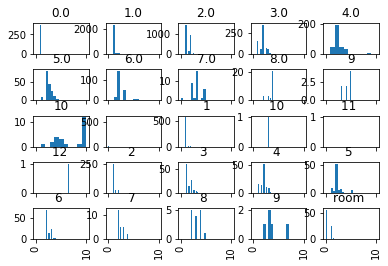

In [18]:
df.hist(column='bath', by=df.bed, sharex=True, label=True)
plt.show()

In [10]:
df.describe(include = 'object')

,address,bed,area,company,neighborhood,utilities,property_type,description,images
count,8779,9203.0,6468,3930,2520,9374,9246,9374,9374
unique,2335,25.0,707,145,14,77,17,4092,2800
top,"Ann Arbor, MI 48104",2.0,0,Cabrio Properties,South University,[],apartment,,[]
freq,118,2613.0,499,318,254,6851,7043,143,3346


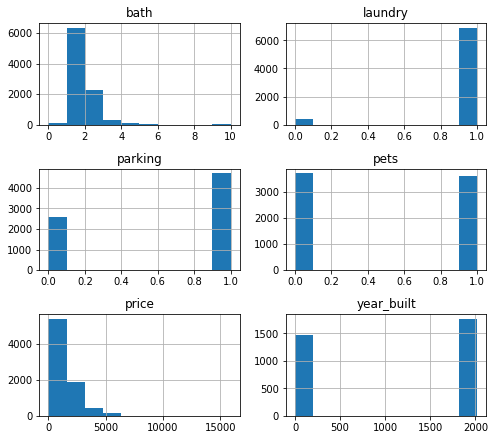

In [11]:
df.hist(figsize=(7,8), layout=(4,2));
plt.tight_layout() 


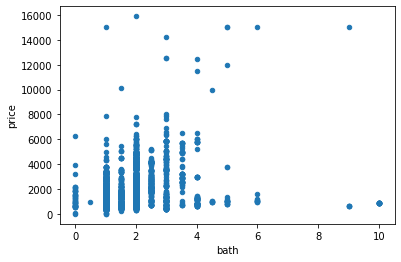

In [12]:
#bath vs price
df.plot(kind = 'scatter', x='bath', y='price')

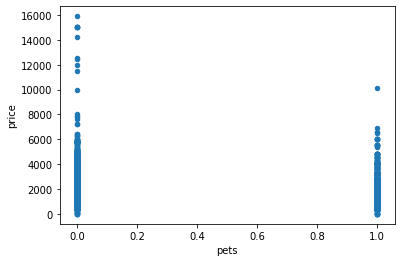

In [13]:
#pets vs price
df.plot(kind = 'scatter', x='pets', y='price')

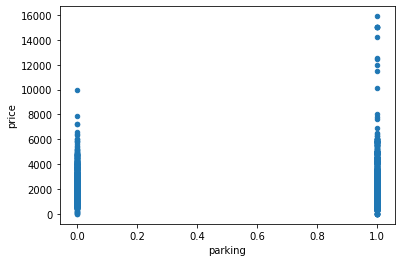

In [14]:
#parking vs price
df.plot(kind = 'scatter', x='parking', y='price')

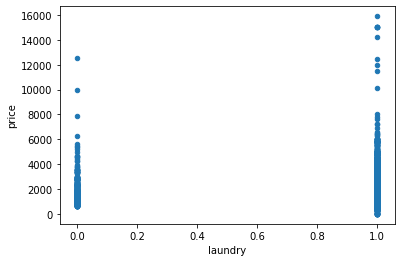

In [15]:
#laundry vs price
df.plot(kind = 'scatter', x='laundry', y='price')

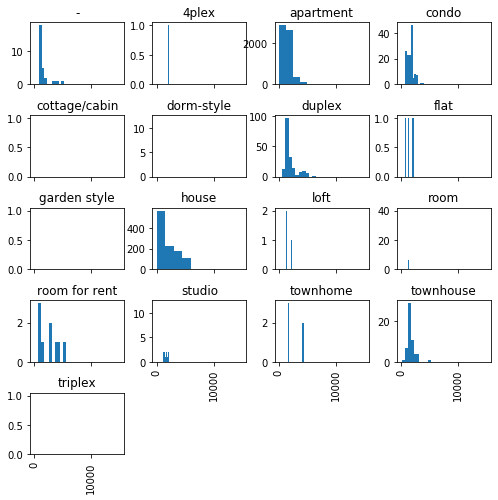

In [33]:
#number of properties, plotted against their prices, for each property type
df.hist(column = 'price', by=df.property_type, sharex=True, label = True, figsize=(8,8))
plt.show()

property_type
-                1622.931034
4plex            1800.000000
apartment        1479.435951
condo            1585.821429
cottage/cabin      99.000000
dorm-style        725.000000
duplex           1934.670270
flat             1510.000000
garden style      995.000000
house            2176.715596
loft             1707.400000
room              838.500000
room for rent    2581.666667
studio           1459.833333
townhome         2672.400000
townhouse        1675.228070
triplex          1600.000000
Name: price, dtype: float64


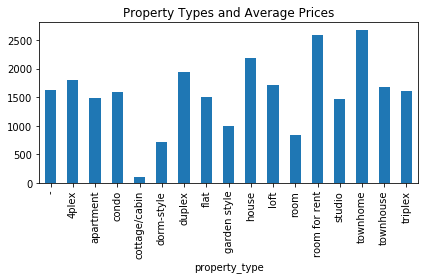

In [3]:
#Property Type and their price mean
dfProp = df.groupby('property_type').mean()
print (dfProp.price)
dfProp.price.plot(kind='bar', title = 'Property Types and Average Prices')
plt.tight_layout()
plt.savefig('Property vs Average Price',dpi=300)